In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import qmc

In [2]:
def random_normal_vector(d,mu, sigma):
    normal_vector = np.random.normal(loc=mu, scale=sigma, size=d)
    return  normal_vector


Standard Brownian Motion Simulation

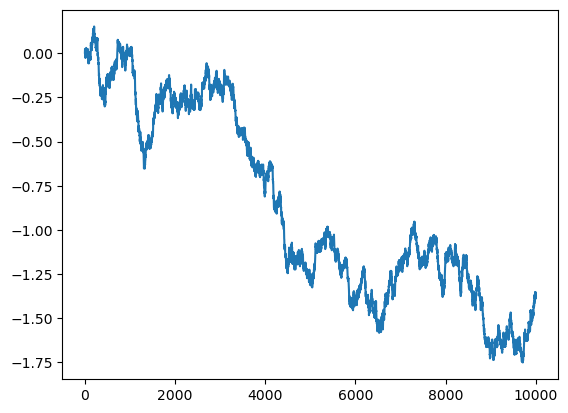

In [3]:
T = 1
d = 10000
delta_t = T/d
#create lower trinangular matrix with ones
lower_tri_matr = np.tril(np.ones([d,d]))
A = math.sqrt(delta_t)*lower_tri_matr
#create Brownian motion
w = A.dot(random_normal_vector(d,0,1))
plt.plot(w)
plt.show()


Asset

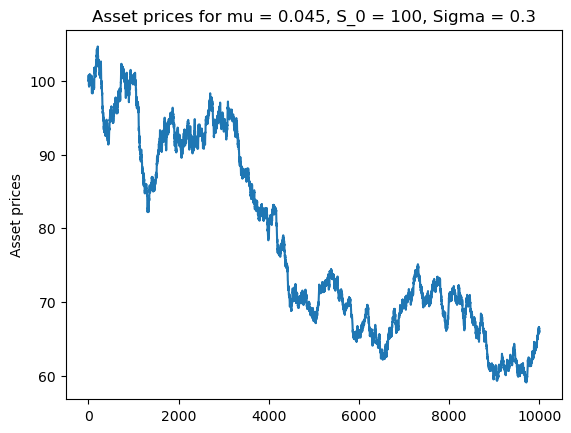

In [4]:
#example
s_0 = 100
mu = 0.045
sigma = 0.3

s = np.zeros(d+1) #+1 weil d mal simuliert wird und aber der Startpreis des Assets auch in dem Vektor steht
s[0] = s_0
delta_s = []

#erstelle gesamten Vekjtor w mit w_0
delta_w = np.concatenate((w[0],np.diff(w)),axis=None)

for i in range(d):
    delta_s.append(mu*s[i]*delta_t + sigma*s[i]*delta_w[i])
    s[i+1] = s[i] + delta_s[i]

plt.plot(s)
plt.title("Asset prices for mu = " + str(mu) + ", S_0 = " + str(s_0) + ", Sigma = " + str(sigma))
plt.ylabel("Asset prices")
plt.show()


In [ ]:
#WICHTIG: S_0 muss im Vektor S sein!!! (per Definition)
def ratched_option(d,S): 
    indic = np.asarray([1 if s > 0 else 0 for s in np.diff(S)])
    payoff = np.average(indic*S[1:(S.size)])  #python spezifisch fehlt dann das erste Element
    return payoff
ratched_option(d,s)